![image.png](attachment:image.png)

In [18]:
# With increasing environmental concerns and the push for sustainable practices, efficient waste management has become a critical aspect for both municipalities and private waste management companies. The traditional approach to waste segregation is largely manual, time-consuming, and prone to errors, leading to suboptimal recycling processes and increased environmental impact.

#     ##Proposed Solution##
# Developing an automated waste segregation system using Deep Neural Networks (DNN) to accurately classify waste items based on the RealWaste dataset. This system aims to improve the efficiency and accuracy of waste segregation at landfills or waste processing facilities, thereby enhancing the recycling process.

#     ##Objectives##
# Enhanced Recycling Rates: By accurately classifying waste materials, the system will contribute to higher recycling rates, reducing landfill usage and environmental impact.
# Operational Efficiency: Automating the segregation process will speed up waste processing, reducing labor costs and time.
# Waste Data Analytics: The system can provide valuable data on waste composition, aiding in future waste management and recycling strategies.

#     ##Project Scope##
# Data Utilization: Employ the RealWaste dataset, which comprises color images of various waste items. The dataset's diversity in waste material types provides a robust basis for training a DNN model.
# Model Development: Design and train a convolutional neural network that can identify and classify different types of waste materials, with a focus on distinguishing between subcategories like transparent and opaque plastics.
# Accuracy Enhancement: Given the moderate size of the dataset, employ data augmentation techniques to enhance the model's accuracy and its ability to generalize to real-world waste items.
# Integration with Waste Management Systems: Plan the integration of the DNN model into existing waste management infrastructure, such as conveyor belt systems at recycling facilities.

#     ##Expected Outcomes##
# High Accuracy in Waste Classification: Achieve a high level of accuracy in classifying waste materials, significantly surpassing manual sorting methods.
# Scalability: Develop a model that can be easily scaled and adapted to different types of waste management facilities.
# Environmental Impact: Quantify the potential reduction in environmental impact through improved recycling rates and reduced landfill usage.

#     ##Potential Challenges##
# Variability in Waste Appearance: Handling the variability in the appearance of waste items, especially in a landfill environment.
# Real-World Application: Ensuring the model's robustness when applied in real-world, diverse waste management settings.
# Data Privacy and Ethics: Addressing any privacy or ethical concerns related to the collection and use of waste image data.
# By addressing this business problem, the project aligns with global sustainability goals and offers a technologically advanced solution to a pressing environmental issue.

In [19]:

# !pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os as os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# References
#Dataset was taken from RealWaste - UCI Machine Learning Repository

os.chdir(r'/content/drive/MyDrive')

In [22]:
import zipfile
zip_file_path = 'realwaste.zip'
os.makedirs('Automated Waste Segregation and Recycling Optimization',exist_ok=True)
target_directory = '/content/drive/MyDrive/Automated Waste Segregation and Recycling Optimization'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_directory)

In [23]:
os.chdir('/content/drive/MyDrive/Automated Waste Segregation and Recycling Optimization/realwaste-main/RealWaste')

In [24]:
# import os

# folder_path = '/content/drive/MyDrive/Automated Waste Segregation and Recycling Optimization/realwaste-main'

# # Check if the folder exists
# if os.path.exists(folder_path) and os.path.isdir(folder_path):
#     try:
#         shutil.rmtree(folder_path)
#         print(f"Folder '{folder_path}' has been deleted.")
#     except Exception as e:
#         print(f"An error occurred: {e}")
# else:
#     print(f"No folder found at '{folder_path}'")

In [25]:
# Creating directory for train dataset
os.makedirs('data/train/Cardboard',exist_ok=True)
os.makedirs('data/train/Food Organics',exist_ok=True)
os.makedirs('data/train/Glass',exist_ok=True)
os.makedirs('data/train/Metal',exist_ok=True)
os.makedirs('data/train/Miscellaneous Trash',exist_ok=True)
os.makedirs('data/train/Paper',exist_ok=True)
os.makedirs('data/train/Plastic',exist_ok=True)
os.makedirs('data/train/Textile Trash',exist_ok=True)
os.makedirs('data/train/Vegetation',exist_ok=True)

# Creating directory for validation datasets
os.makedirs('data/valid/Cardboard',exist_ok=True)
os.makedirs('data/valid/Food Organics',exist_ok=True)
os.makedirs('data/valid/Glass',exist_ok=True)
os.makedirs('data/valid/Metal',exist_ok=True)
os.makedirs('data/valid/Miscellaneous Trash',exist_ok=True)
os.makedirs('data/valid/Paper',exist_ok=True)
os.makedirs('data/valid/Plastic',exist_ok=True)
os.makedirs('data/valid/Textile Trash',exist_ok=True)
os.makedirs('data/valid/Vegetation',exist_ok=True)

# Creating directory for test datasets
os.makedirs('data/test/Cardboard',exist_ok=True)
os.makedirs('data/test/Food Organics',exist_ok=True)
os.makedirs('data/test/Glass',exist_ok=True)
os.makedirs('data/test/Metal',exist_ok=True)
os.makedirs('data/test/Miscellaneous Trash',exist_ok=True)
os.makedirs('data/test/Paper',exist_ok=True)
os.makedirs('data/test/Plastic',exist_ok=True)
os.makedirs('data/test/Textile Trash',exist_ok=True)
os.makedirs('data/test/Vegetation',exist_ok=True)

In [26]:
# Number of images in each class
Cardboard= 461
Food_Organics= 411
Glass= 420
Metal= 790
Miscellaneous_Trash= 495
Paper= 500
Plastic= 921
Textile_Trash= 318
Vegetation= 436

# Moving image classes to its train dataset folder
for c in random.sample(glob.glob('Cardboard/Card*'), round(Cardboard*0.90)):
    shutil.move(c, 'data/train/Cardboard')
for c in random.sample(glob.glob('Food Organics/Food*'), round(Food_Organics*0.90)):
    shutil.move(c, 'data/train/Food Organics')
for c in random.sample(glob.glob('Glass/Glass*'), round(Glass*0.90)):
    shutil.move(c, 'data/train/Glass')
for c in random.sample(glob.glob('Metal/Metal*'), round(Metal*0.90)):
    shutil.move(c, 'data/train/Metal')
for c in random.sample(glob.glob('Miscellaneous Trash/Misce*'), round(Miscellaneous_Trash*0.90)):
    shutil.move(c, 'data/train/Miscellaneous Trash')
for c in random.sample(glob.glob('Paper/Paper*'), round(Paper*0.90)):
    shutil.move(c, 'data/train/Paper')
for c in random.sample(glob.glob('Plastic/Plastic*'), round(Plastic*0.90)):
    shutil.move(c, 'data/train/Plastic')
for c in random.sample(glob.glob('Textile Trash/Tex*'), round(Textile_Trash*0.90)):
    shutil.move(c, 'data/train/Textile Trash')
for c in random.sample(glob.glob('Vegetation/Veg*'), round(Vegetation*0.90)):
    shutil.move(c, 'data/train/Vegetation')

# Moving image classes to its validation dataset folder
for c in random.sample(glob.glob('Cardboard/Card*'), round(Cardboard*0.03)):
    shutil.move(c, 'data/valid/Cardboard')
for c in random.sample(glob.glob('Food Organics/Food*'), round(Food_Organics*0.03)):
    shutil.move(c, 'data/valid/Food Organics')
for c in random.sample(glob.glob('Glass/Glass*'), round(Glass*0.03)):
    shutil.move(c, 'data/valid/Glass')
for c in random.sample(glob.glob('Metal/Metal*'), round(Metal*0.03)):
    shutil.move(c, 'data/valid/Metal')
for c in random.sample(glob.glob('Miscellaneous Trash/Misce*'), round(Miscellaneous_Trash*0.03)):
    shutil.move(c, 'data/valid/Miscellaneous Trash')
for c in random.sample(glob.glob('Paper/Paper*'), round(Paper*0.03)):
    shutil.move(c, 'data/valid/Paper')
for c in random.sample(glob.glob('Plastic/Plastic*'), round(Plastic*0.03)):
    shutil.move(c, 'data/valid/Plastic')
for c in random.sample(glob.glob('Textile Trash/Tex*'), round(Textile_Trash*0.03)):
    shutil.move(c, 'data/valid/Textile Trash')
for c in random.sample(glob.glob('Vegetation/Veg*'), round(Vegetation*0.0)):
    shutil.move(c, 'data/valid/Vegetation')

In [27]:
# Moving image classes to its test dataset folder
for c in random.sample(glob.glob('Cardboard/Card*'), round(Cardboard*0.069)):
    shutil.move(c, 'data/test/Cardboard')
for c in random.sample(glob.glob('Food Organics/Food*'), round(Food_Organics*0.069)):
    shutil.move(c, 'data/test/Food Organics')
for c in random.sample(glob.glob('Glass/Glass*'), round(Glass*0.069)):
    shutil.move(c, 'data/test/Glass')
for c in random.sample(glob.glob('Metal/Metal*'), round(Metal*0.069)):
    shutil.move(c, 'data/test/Metal')
for c in random.sample(glob.glob('Miscellaneous Trash/Misce*'), round(Miscellaneous_Trash*0.069)):
    shutil.move(c, 'data/test/Miscellaneous Trash')
for c in random.sample(glob.glob('Paper/Paper*'), round(Paper*0.069)):
    shutil.move(c, 'data/test/Paper')
for c in random.sample(glob.glob('Plastic/Plastic*'), round(Plastic*0.069)):
    shutil.move(c, 'data/test/Plastic')
for c in random.sample(glob.glob('Textile Trash/Tex*'), round(Textile_Trash*0.069)):
    shutil.move(c, 'data/test/Textile Trash')
for c in random.sample(glob.glob('Vegetation/Veg*'), round(Vegetation*0.069)):
    shutil.move(c, 'data/test/Vegetation')


In [28]:
train_pa = 'data/train'
valid_pa = 'data/valid'
test_pa = 'data/test'

In [29]:
# train_ba = ImageDataGenerator(zoom_range=0.5,
#         horizontal_flip=True,) \
#     .flow_from_directory(directory=train_pa, \
#     classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation'], \
#     batch_size=30)
# valid_ba = ImageDataGenerator(zoom_range=0.5,
#         horizontal_flip=True,) \
#     .flow_from_directory(directory=valid_pa, \
#     classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation'], \
#     batch_size=30)
# test_ba = ImageDataGenerator(zoom_range=0.5,
#         horizontal_flip=True,) \
#     .flow_from_directory(directory=test_pa, \
#     classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation'], \
#     batch_size=30)

# import logging
# tf.get_logger().setLevel(logging.ERROR)

# imgs, labels = next(train_ba)
# def plotImages(images_arr):
#     fig, axes = plt.subplots(1, 10, figsize=(50,50))
#     axes = axes.flatten()
#     for img, ax in zip(images_arr, axes):
#         ax.imshow(img)
#         ax.axis('off')
#     plt.tight_layout()
#     plt.show()



In [30]:
# pre_model= 'vgg16'
# # pre_model_1=inception_v3
# # pre_model_2=inception_v3

In [31]:
# train_ba_in_v3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input ) \
#     .flow_from_directory(directory=train_pa, \
#     classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation'], \
#     batch_size=30)
# valid_ba_in_v3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input ,
#         horizontal_flip=True,) \
#     .flow_from_directory(directory=valid_pa, \
#     classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation'], \
#     batch_size=30)
# test_ba_in_v3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input ,
#         horizontal_flip=True,) \
#     .flow_from_directory(directory=test_pa, \
#     classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation'], \
#     batch_size=30)

In [32]:


# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data generator without augmentation
valid_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Test data generator without augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_ba_in_v3 = train_datagen.flow_from_directory(
    directory=train_pa,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
)

valid_ba_in_v3 = valid_datagen.flow_from_directory(
    directory=valid_pa,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
)

test_ba_in_v3 = test_datagen.flow_from_directory(
    directory=test_pa,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 4277 images belonging to 9 classes.
Found 131 images belonging to 9 classes.
Found 328 images belonging to 9 classes.


In [59]:
# import matplotlib.pyplot as plt
# import cv2
# def plotImages(images_arr):
#     # Assuming you want to display the first 10 images
#     num_images = min(len(images_arr), 10)

#     # Create a subplot of 1 row, num_images columns
#     fig, axes = plt.subplots(1, num_images, figsize=(50, 50))
#     axes = axes.flatten()

#     for img, ax in zip(images_arr[:num_images], axes):
#         # Convert BGR to RGB
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         ax.imshow(img_rgb)
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()

# imgs, labels = next(train_ba_in_v3)
# plotImages(imgs)
# print(labels)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Define AlexNet model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Second Convolutional Layer
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Third Convolutional Layer
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Fourth Convolutional Layer
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Fifth Convolutional Layer
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Flatten the output and apply Fully Connected layers
model.add(Flatten())

# First Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Second Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer for 9 classes
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_10 (Ba  (None, 54, 54, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_11 (Ba  (None, 26, 26, 256)       1024      
 tchNormalization)                                               
                                                      

In [41]:
tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [61]:
# Fit the model
history = model.fit(
    train_ba_in_v3,
    validation_data=valid_ba_in_v3,
    epochs=80,  # Increase the number of epochs
    verbose=2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/80
134/134 - 85s - loss: 5.6422 - accuracy: 0.2371 - val_loss: 2.6447 - val_accuracy: 0.1458 - 85s/epoch - 635ms/step
Epoch 2/80
134/134 - 77s - loss: 2.0131 - accuracy: 0.3299 - val_loss: 1.6186 - val_accuracy: 0.4514 - 77s/epoch - 577ms/step
Epoch 3/80
134/134 - 75s - loss: 1.8496 - accuracy: 0.3528 - val_loss: 1.7446 - val_accuracy: 0.3611 - 75s/epoch - 563ms/step
Epoch 4/80
134/134 - 78s - loss: 1.7769 - accuracy: 0.3853 - val_loss: 1.5523 - val_accuracy: 0.4722 - 78s/epoch - 584ms/step
Epoch 5/80
134/134 - 77s - loss: 1.7211 - accuracy: 0.4064 - val_loss: 1.5832 - val_accuracy: 0.4306 - 77s/epoch - 573ms/step
Epoch 6/80
134/134 - 78s - loss: 1.6573 - accuracy: 0.4323 - val_loss: 1.4212 - val_accuracy: 0.5000 - 78s/epoch - 581ms/step
Epoch 7/80
134/134 - 76s - loss: 1.6641 - accuracy: 0.4309 - val_loss: 1.4787 - val_accuracy: 0.4861 - 76s/epoch - 568ms/step
Epoch 8/80
134/134 - 78s - loss: 1.5572 - accuracy: 0.4650 - val_loss: 1.9390 - val_accuracy: 0.4583 - 78s/epoch - 585

11/11 - 2s - 2s/epoch - 199ms/step


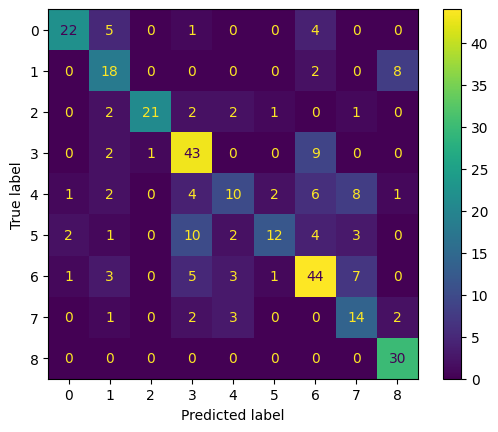

In [64]:
import numpy as np # Import the NumPy library and assign it the alias 'np'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# Evaluate on the test set
predictions = model.predict(test_ba_in_v3, verbose=2)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1) # Now you can use 'np' to reference NumPy functions
true_classes = test_ba_in_v3.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Now you can use ConfusionMatrixDisplay
disp.plot()
plt.show()

In [75]:
from sklearn.metrics import classification_report

# Assuming predictions and true_classes have been defined
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_ba_in_v3.classes

# Define class names
class_names = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names, output_dict=True)

# Extract and display class accuracy percentages
for class_name, metrics in report.items():
    if class_name in class_names:
        print(f"Accuracy for class {class_name}: {metrics['precision']*100:.2f}%")


Accuracy for class Cardboard: 84.62%
Accuracy for class Food Organics: 52.94%
Accuracy for class Glass: 95.45%
Accuracy for class Metal: 64.18%
Accuracy for class Miscellaneous Trash: 50.00%
Accuracy for class Paper: 75.00%
Accuracy for class Plastic: 63.77%
Accuracy for class Textile Trash: 42.42%
Accuracy for class Vegetation: 73.17%


In [76]:
from sklearn.metrics import accuracy_score

total_accuracy = accuracy_score(true_classes, predicted_classes)

# Display total accuracy percentage
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 65.24%


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


# Load the ResNet50 model with pre-trained weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation='softmax')(x)

# Construct the final model
model_1 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_1.summary()

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7)

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [34]:
# Train the model
history = model_1.fit(
    train_ba_in_v3,
    validation_data=valid_ba_in_v3,
    epochs=50,
    verbose=2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
134/134 - 76s - loss: 2.9149 - accuracy: 0.1976 - val_loss: 2.1068 - val_accuracy: 0.3206 - lr: 1.0000e-05 - 76s/epoch - 569ms/step
Epoch 2/50
134/134 - 66s - loss: 2.0962 - accuracy: 0.3559 - val_loss: 1.6736 - val_accuracy: 0.4504 - lr: 1.0000e-05 - 66s/epoch - 494ms/step
Epoch 3/50
134/134 - 66s - loss: 1.7216 - accuracy: 0.4611 - val_loss: 1.4830 - val_accuracy: 0.5191 - lr: 1.0000e-05 - 66s/epoch - 492ms/step
Epoch 4/50
134/134 - 67s - loss: 1.4930 - accuracy: 0.5254 - val_loss: 1.3922 - val_accuracy: 0.5420 - lr: 1.0000e-05 - 67s/epoch - 496ms/step
Epoch 5/50
134/134 - 66s - loss: 1.3722 - accuracy: 0.5712 - val_loss: 1.2559 - val_accuracy: 0.5649 - lr: 1.0000e-05 - 66s/epoch - 492ms/step
Epoch 6/50
134/134 - 67s - loss: 1.2392 - accuracy: 0.6023 - val_loss: 1.1716 - val_accuracy: 0.5954 - lr: 1.0000e-05 - 67s/epoch - 498ms/step
Epoch 7/50
134/134 - 66s - loss: 1.1762 - accuracy: 0.6259 - val_loss: 1.1117 - val_accuracy: 0.6183 - lr: 1.0000e-05 - 66s/epoch - 493ms/step

In [36]:
# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training with fine-tuning
history_fine = model_1.fit(
    train_ba_in_v3,
    validation_data=valid_ba_in_v3,
    epochs=50,
    verbose=2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
134/134 - 83s - loss: 0.7689 - accuracy: 0.7517 - val_loss: 0.5504 - val_accuracy: 0.8397 - lr: 1.0000e-05 - 83s/epoch - 620ms/step
Epoch 2/50
134/134 - 66s - loss: 0.5863 - accuracy: 0.8073 - val_loss: 0.5779 - val_accuracy: 0.8321 - lr: 1.0000e-05 - 66s/epoch - 494ms/step
Epoch 3/50
134/134 - 66s - loss: 0.5055 - accuracy: 0.8300 - val_loss: 0.5343 - val_accuracy: 0.8244 - lr: 1.0000e-05 - 66s/epoch - 493ms/step
Epoch 4/50
134/134 - 67s - loss: 0.4587 - accuracy: 0.8448 - val_loss: 0.5316 - val_accuracy: 0.8397 - lr: 1.0000e-05 - 67s/epoch - 496ms/step
Epoch 5/50
134/134 - 66s - loss: 0.4093 - accuracy: 0.8635 - val_loss: 0.5149 - val_accuracy: 0.8321 - lr: 1.0000e-05 - 66s/epoch - 496ms/step
Epoch 6/50
134/134 - 67s - loss: 0.3787 - accuracy: 0.8674 - val_loss: 0.5029 - val_accuracy: 0.8473 - lr: 1.0000e-05 - 67s/epoch - 498ms/step
Epoch 7/50
134/134 - 66s - loss: 0.3224 - accuracy: 0.8871 - val_loss: 0.4441 - val_accuracy: 0.8473 - lr: 1.0000e-05 - 66s/epoch - 494ms/step

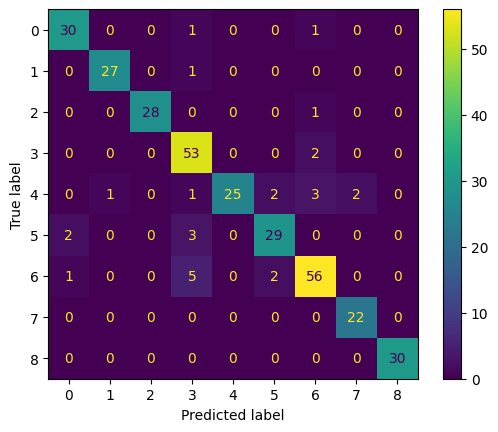

                     precision    recall  f1-score   support

          Cardboard       0.91      0.94      0.92        32
      Food Organics       0.96      0.96      0.96        28
              Glass       1.00      0.97      0.98        29
              Metal       0.83      0.96      0.89        55
Miscellaneous Trash       1.00      0.74      0.85        34
              Paper       0.88      0.85      0.87        34
            Plastic       0.89      0.88      0.88        64
      Textile Trash       0.92      1.00      0.96        22
         Vegetation       1.00      1.00      1.00        30

           accuracy                           0.91       328
          macro avg       0.93      0.92      0.92       328
       weighted avg       0.92      0.91      0.91       328

Total Accuracy: 91.46%


In [37]:
# Evaluate the model on the test set
predictions = model_1.predict(test_ba_in_v3, verbose=0)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_ba_in_v3.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation'])
print(report)

# Calculate and display total accuracy percentage
total_accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")